<a href="https://colab.research.google.com/github/claudiasofiaC/image_classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Image classification using keras cifar10 image set**


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

https://keras.io/api/datasets/cifar10/

#*classes*
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

In [1]:
# imports
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
# load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
# take a peek
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# get the shape of arrays
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [ ]:
# take a look at the first image as an array
index = 0
x_train[index]

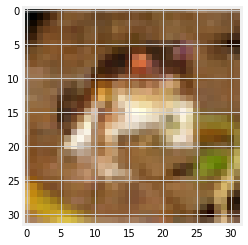

In [7]:
# shwo the image as a picture
img = plt.imshow(x_train[index])

In [ ]:
# a little frog! 

In [8]:
# get the image label
print('The image label is: ', y_train[index])

The image label is:  [6]


In [9]:
# get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'horse', 'ship', 'truck']
# print the image class
print('The image class is: ', classification[y_train[index][0]])

The image class is:  frog


In [ ]:
# another!
index = 10
x_train[index]

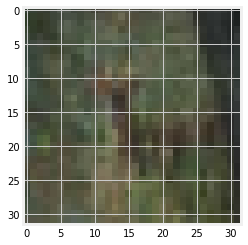

In [12]:
# show image
img = plt.imshow(x_train[10])

In [13]:
# get classification
print('The image class is: ', classification[y_train[10][0]])

The image class is:  deer


In [ ]:
# ok i guess

#**Convert the labels into a set of 10 numbers to input into the neural network**

In [14]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print('hothothot')

hothothot


In [15]:
# print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [16]:
# print new label of that blurry deer
print('The one hot abel is: ', y_train_one_hot[10])

The one hot abel is:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#**Normalize the pixels to be values between 0 and 1**

In [17]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# check that values are btwn 0 and 1
x_train[10]

#**Create the model architecture**


In [20]:
model = Sequential()

# add the first layer
# first input layer requires an input shape
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

# add a pooling layer
# creates a pooling layer with a 2x2 pixel filter to get the max element from the feature maps
model.add(MaxPooling2D(pool_size=(2,2)))

# convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))

# add anther pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# add a flattening layer
# reduces the dimensionality to a linear array
model.add(Flatten())

# add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# add a drop out layer
model.add(Dropout(0.5))

# add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

# add a drop out layer
model.add(Dropout(0.5))

# add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

# add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))


#**Compile the model**

In [21]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#**Train the model**
- x_train and y_tain_one_hot
- use 20% as validation set


In [23]:
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 56s 358ms/step - loss: 1.7428 - accuracy: 0.3570 - val_loss: 1.4615 - val_accuracy: 0.4723
Epoch 2/10
157/157 [==============================] - 55s 353ms/step - loss: 1.3697 - accuracy: 0.5038 - val_loss: 1.3382 - val_accuracy: 0.5241
Epoch 3/10
157/157 [==============================] - 53s 336ms/step - loss: 1.2164 - accuracy: 0.5671 - val_loss: 1.2043 - val_accuracy: 0.5773
Epoch 4/10
157/157 [==============================] - 52s 332ms/step - loss: 1.0828 - accuracy: 0.6178 - val_loss: 1.1299 - val_accuracy: 0.6080
Epoch 5/10
157/157 [==============================] - 55s 352ms/step - loss: 0.9657 - accuracy: 0.6597 - val_loss: 1.0348 - val_accuracy: 0.6351
Epoch 6/10
157/157 [==============================] - 57s 361ms/step - loss: 0.8513 - accuracy: 0.7002 - val_loss: 1.0150 - val_accuracy: 0.6455
Epoch 7/10
157/157 [==============================] - 57s 362ms/step - loss: 0.7402 - accuracy: 0.7404 - val_loss: 1.0436 - val_ac

#**Evalute the model**

In [24]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 1.1706 - accuracy: 0.6561


0.6560999751091003

##**Visualize the models accuracy**



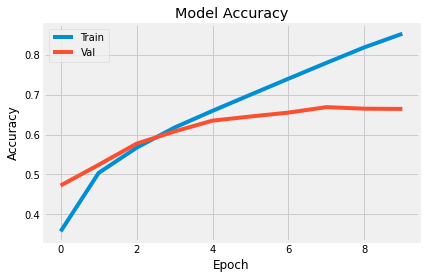

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

#**Visualize the models loss**


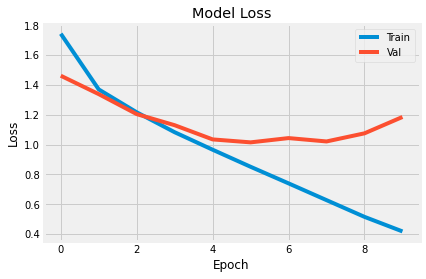

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

I did not add a dropout layer between neurons 1000 and 500
Which is probably why I got such wonky scores on my validation set and a bleh score on the test set

In [ ]:
# now with a dropout

#**Create model architecture**

In [28]:
model = Sequential()

# add the first layer
# first input layer requires an input shape
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

# add a pooling layer
# creates a pooling layer with a 2x2 pixel filter to get the max element from the feature maps
model.add(MaxPooling2D(pool_size=(2,2)))

# convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))

# add anther pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# add a flattening layer
# reduces the dimensionality to a linear array
model.add(Flatten())

# add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# add a drop out layer
model.add(Dropout(0.5))

# add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

# add a drop out layer
model.add(Dropout(0.5))

# add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

# add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))


#**Compile the model**

In [29]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#**Fit the model**

In [30]:
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 57s 365ms/step - loss: 1.7982 - accuracy: 0.3239 - val_loss: 1.4525 - val_accuracy: 0.4596
Epoch 2/10
157/157 [==============================] - 56s 357ms/step - loss: 1.4045 - accuracy: 0.4856 - val_loss: 1.3124 - val_accuracy: 0.5226
Epoch 3/10
157/157 [==============================] - 56s 356ms/step - loss: 1.2620 - accuracy: 0.5462 - val_loss: 1.1691 - val_accuracy: 0.5870
Epoch 4/10
157/157 [==============================] - 54s 347ms/step - loss: 1.1570 - accuracy: 0.5886 - val_loss: 1.0958 - val_accuracy: 0.6148
Epoch 5/10
157/157 [==============================] - 55s 349ms/step - loss: 1.0701 - accuracy: 0.6219 - val_loss: 1.0394 - val_accuracy: 0.6316
Epoch 6/10
157/157 [==============================] - 56s 355ms/step - loss: 0.9986 - accuracy: 0.6473 - val_loss: 1.0275 - val_accuracy: 0.6377
Epoch 7/10
157/157 [==============================] - 57s 360ms/step - loss: 0.9425 - accuracy: 0.6674 - val_loss: 0.9826 - val_ac

#**Evaluate**

In [31]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 1.0079 - accuracy: 0.6577


0.6577000021934509

#**Visualize Accuracy and Loss**

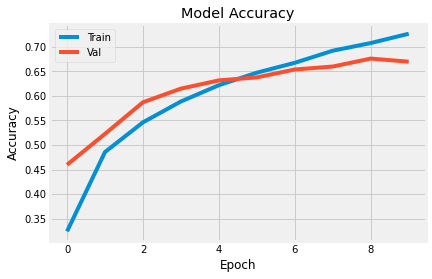

In [32]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

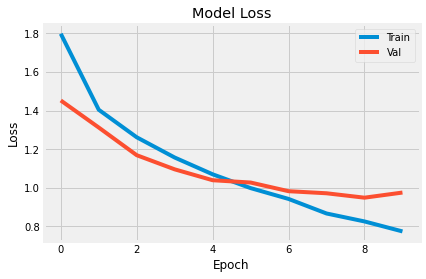

In [33]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

##OK much better

#**Test model on new images**

In [35]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


##Show image

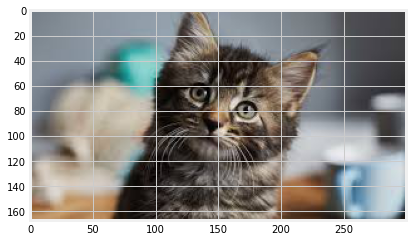

In [36]:
new_image = plt.imread('cat.jpg')
img = plt.imshow(new_image)

##Resize the image

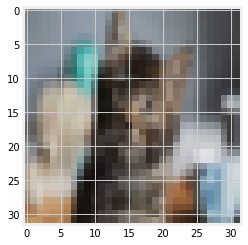

In [37]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

##Get the models predictions

In [38]:
predictions = model.predict(np.array([resized_image]))

##Show the predictions

In [39]:
predictions

array([[0.0028043 , 0.00100484, 0.06597553, 0.4239917 , 0.11000451,
        0.21813217, 0.05088487, 0.11617798, 0.00650146, 0.00452268]],
      dtype=float32)

##Sort the predictions from least to greatest

In [40]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
      
print(list_index)

[3, 5, 7, 4, 2, 6, 8, 9, 0, 1]


##Print first 2 predictions

In [47]:
for i in range(2):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 0), '%')


cat : 42.0 %
dog : 22.0 %
